In [15]:
import numpy as np
import matplotlib.pyplot as plt

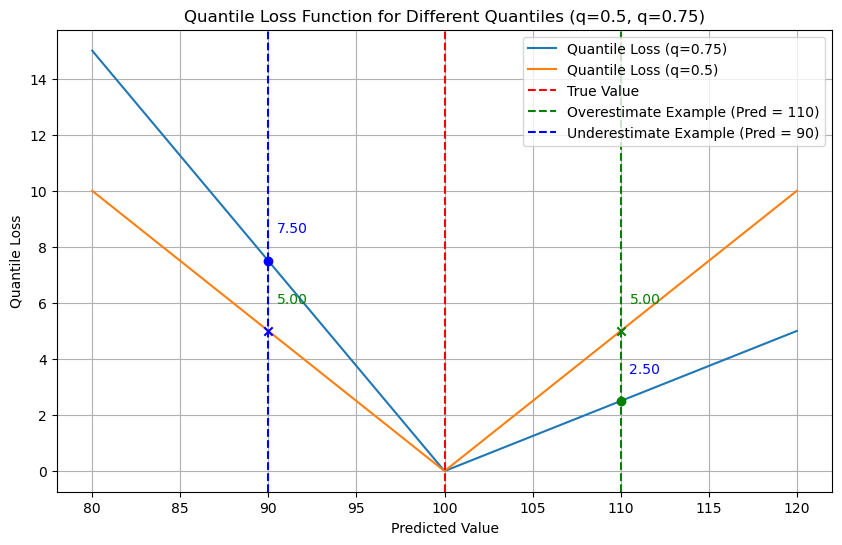

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quantile loss function
def quantile_loss(q, y, y_hat_q):
    """ Calculate the quantile loss for a given quantile.

    Args:
    q (float): The quantile to be evaluated, e.g., 0.5 for median.
    y (float): The target value.
    y_hat_q (float): The quantile forecast.
    """
    error = y - y_hat_q
    return np.maximum(q * error, (q - 1) * error)

# Parameters
y = 100
y_hat_range = np.linspace(80, 120, 400)

# Calculate losses for different quantiles
q_75 = 0.75
loss_75 = quantile_loss(q_75, y, y_hat_range)

q_50 = 0.5
loss_50 = quantile_loss(q_50, y, y_hat_range)

# Plotting the quantile losses
plt.figure(figsize=(10, 6))

# Plot the different quantile loss curves
plt.plot(y_hat_range, loss_75, label=f'Quantile Loss (q={q_75})')
plt.plot(y_hat_range, loss_50, label=f'Quantile Loss (q={q_50})')

# Mark the true value and example predictions
plt.axvline(x=y, color='r', linestyle='--', label='True Value')
plt.axvline(x=110, color='g', linestyle='--', label='Overestimate Example (Pred = 110)')
plt.axvline(x=90, color='b', linestyle='--', label='Underestimate Example (Pred = 90)')

# Scatter points for example predictions
plt.scatter([110], [quantile_loss(q_75, y, 110)], color='g', zorder=5)
plt.scatter([90], [quantile_loss(q_75, y, 90)], color='b', zorder=5)

# Annotate example predictions for q=0.75
plt.text(110.5, quantile_loss(q_75, y, 110) + 1, f'{quantile_loss(q_75, y, 110):.2f}', color='b')
plt.text(90.5, quantile_loss(q_75, y, 90) + 1, f'{quantile_loss(q_75, y, 90):.2f}', color='b')

# Scatter points for example predictions for q=0.5
plt.scatter([110], [quantile_loss(q_50, y, 110)], color='g', marker='x', zorder=5)
plt.scatter([90], [quantile_loss(q_50, y, 90)], color='b', marker='x', zorder=5)

# Annotate example predictions for q=0.5
plt.text(110.5, quantile_loss(q_50, y, 110) + 1, f'{quantile_loss(q_50, y, 110):.2f}', color='g')
plt.text(90.5, quantile_loss(q_50, y, 90) + 1, f'{quantile_loss(q_50, y, 90):.2f}', color='g')

plt.xlabel('Predicted Value')
plt.ylabel('Quantile Loss')
plt.title('Quantile Loss Function for Different Quantiles (q=0.5, q=0.75)')
plt.legend()
plt.grid(True)
plt.show()